### Exploratory data analysis

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


### Look on FINRED dataset


In [ ]:


pd.set_option("display.max_colwidth", None)

df = pd.read_parquet("../datasets/raw/train.parquet")

df = df.drop(columns=["instruction"])

df = df.drop_duplicates(subset=["input", "output"]).reset_index(drop=True)

print(df.shape)
print(df.head())


(5700, 2)
                                                                                                                                                                                                                               input  \
0              NEW YORK (Reuters) - Apple Inc Chief Executive Steve Jobs sought to soothe investor concerns about his health on Monday, saying his weight loss was caused by a hormone imbalance that is relatively simple to treat.   
1                                                          Last week, Citigroup Inc's ( C.N ) Chief Executive Vikram Pandit said that he, Chairman Win Bischoff, and senior adviser Robert Rubin would not receive bonuses for 2008.   
2                                                             Lehman Brothers LEH.N shares fell sharply on Monday on speculation that the investment bank could be bought for $15 a share, a price well below current market levels.   
3  Franz told Reuters that Fiat Chief Executive Sergio Marchio

### Types of relations

In [ ]:
import re
from collections import Counter

rels = []
for row in df["output"]:
    for r in re.findall(r"([a-z_]+):", row): 
        rels.append(r)

Counter(rels).most_common(20)

[('product_or_material_produced', 1373),
 ('industry', 1167),
 ('owned_by', 673),
 ('headquarters_location', 602),
 ('parent_organization', 524),
 ('employer', 482),
 ('owner_of', 450),
 ('subsidiary', 351),
 ('developer', 267),
 ('location_of_formation', 238),
 ('manufacturer', 198),
 ('position_held', 186),
 ('founded_by', 174),
 ('chief_executive_officer', 160),
 ('stock_exchange', 159),
 ('operator', 157),
 ('chairperson', 154),
 ('legal_form', 97),
 ('brand', 91),
 ('creator', 84)]

### Types of Entity

In [16]:
entities = []
for row in df["output"]:
    for part in row.split(";"):
        if ":" in part:
            _, pair = part.split(":", 1)
            for ent in pair.split(","):
                entities.append(ent.strip())

Counter(entities).most_common(20)

#counter = Counter(entities)
#rare_entities = counter.most_common()[:-21:-1]
#print(rare_entities)

[('retail', 205),
 ('Microsoft', 190),
 ('London', 187),
 ('Glencore', 183),
 ('Berkshire Hathaway', 161),
 ('Apple Inc', 137),
 ('Google', 137),
 ('Airbus', 137),
 ('Warren Buffett', 115),
 ('mining', 107),
 ('London Stock Exchange', 106),
 ('Samsung', 101),
 ('software', 94),
 ('Syriza', 93),
 ('PayPal', 89),
 ('General Electric', 87),
 ('eBay', 85),
 ('aircraft', 85),
 ('Electronics', 73),
 ('Stratasys', 71)]

### Lenght of text

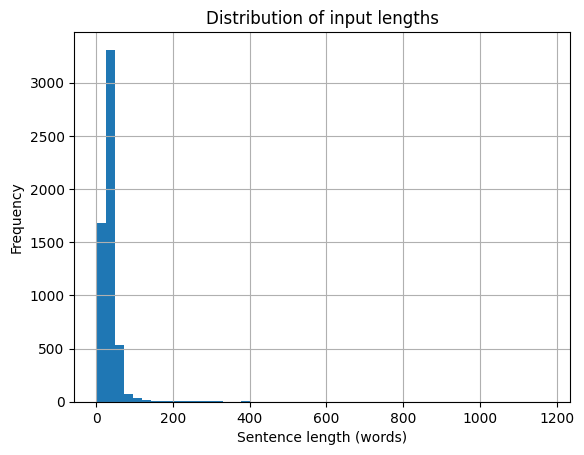

In [19]:
df["length"] = df["input"].str.split().apply(len)
df["length"].describe()

df["length"].hist(bins=50)
plt.xlabel("Sentence length (words)")
plt.ylabel("Frequency")
plt.title("Distribution of input lengths")
plt.show()


### Look at one example

In [ ]:
ind = 8

print("Text:", df.loc[ind, "input"])
print("Triplets:", df.loc[ind, "output"])


Text: Chrysler said it would close the assembly plant -- one of two North American facilities dedicated to the Dodge Caravan and Chrysler Town & Country -- and eliminate a shift at a nearby assembly plant that makes the Dodge Ram pickup truck.
Triplets: manufacturer: Dodge Caravan, Chrysler; brand: Dodge Ram, Dodge; manufacturer: Ram pickup, Chrysler; manufacturer: Dodge Ram, Dodge; brand: Dodge Caravan, Dodge


### Look on FINER dataset

In [ ]:

import pandas as pd

train_path = "../datasets/raw/train.csv"
val_path = "../datasets/raw/val.csv"
test_path = "../datasets/raw/test.csv"

train = pd.read_csv(train_path)
val = pd.read_csv(val_path)
test = pd.read_csv(test_path)

print("Train shape:", train.shape)
print("Validation shape:", val.shape)
print("Test shape:", test.shape)

train.head()



Train shape: (80531, 4)
Validation shape: (10233, 4)
Test shape: (25957, 4)


,gold_label,gold_token,doc_idx,sent_idx
0,0,Kenyan,0,0
1,0,Firms,0,0
2,0,Eye,0,0
3,0,Deals,0,0
4,0,During,0,0


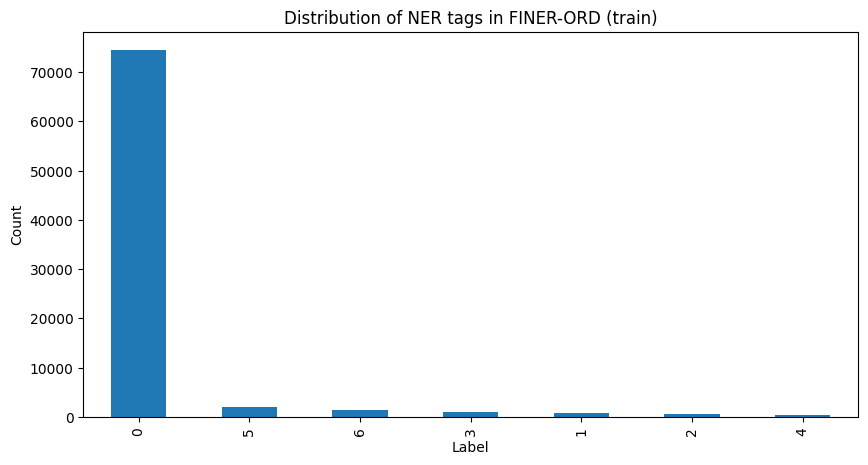

gold_label
0    74462
5     2026
6     1414
3      966
1      821
2      553
4      289
Name: count, dtype: int64

In [3]:
import matplotlib.pyplot as plt

label_counts = train['gold_label'].value_counts()

plt.figure(figsize=(10,5))
label_counts.plot(kind='bar')
plt.title('Distribution of NER tags in FINER-ORD (train)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

label_counts


Average sentence length: 24.687614960147148


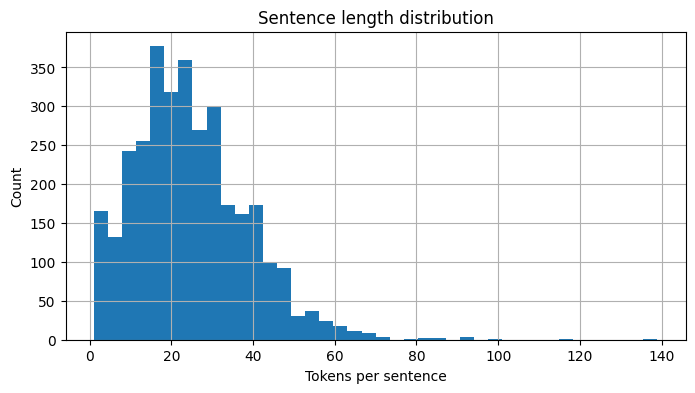

In [4]:
sentence_lengths = train.groupby(['doc_idx', 'sent_idx']).size()
print("Average sentence length:", sentence_lengths.mean())

plt.figure(figsize=(8,4))
sentence_lengths.hist(bins=40)
plt.title('Sentence length distribution')
plt.xlabel('Tokens per sentence')
plt.ylabel('Count')
plt.show()


In [5]:
print("Unique documents:", train['doc_idx'].nunique())
print("Unique sentences:", train[['doc_idx', 'sent_idx']].drop_duplicates().shape[0])


Unique documents: 135
Unique sentences: 3262
